# 07 - Analyse Temporelle Univariée 

> ## Série Temporelle Brute
> ### Quel jeu de données choisir ?
Tout d'abord on sélectionne le jeu de données "sstCOPERNICUS20102019Processed" puisque ce dernier contient nos données groupées, ayant les mêmes unitées et sans NaN.
On ne prendra pas notre jeu de données désaisonnalisé puisque sinon il ne s'agira plus de données "brutes" et que le cycle annuel est une réalité physique pas simplement un bruit.
> ### Comment applique-t-on notre réduction dimensionelle ?
Nous partons d'un jeu de données comme : SST(t,lat,lon)
Et puisque nous souhaitons une analyse temporelle univariée on souhaite arriver à SST(t).
Ainsi on réalisera une moyenne spatiale puisqu'elle permet de transformer notre champ 3D en une série 1D. De plus elle permet de représenter l'état thermique moyen de la température à la surface de la Manche.

Minimum = 6.613592624664307
Maximum = 18.623645782470703
Amplitude = 12.010053634643555


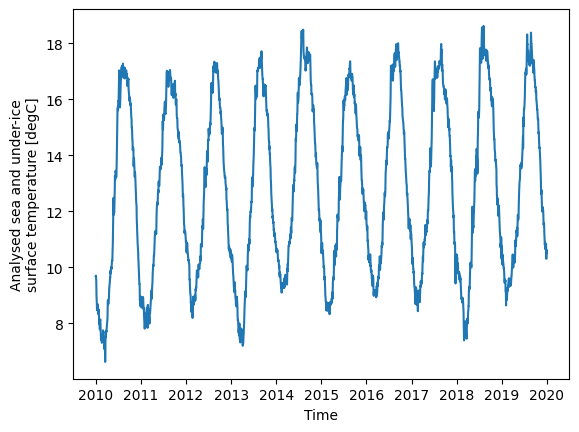

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

dataset = xr.open_dataset("../../data/processed/sstCOPERNICUS20102019Processed.nc")

sst = dataset["analysed_sst"]

sstTemporelUnivariee = sst.mean(dim=["latitude","longitude"])
sstTemporelUnivariee.plot()
plt.show

print("Minimum =", float(sstTemporelUnivariee.min()))
print("Maximum =", float(sstTemporelUnivariee.max()))
print("Amplitude =", float(sstTemporelUnivariee.max() - sstTemporelUnivariee.min()))


> ### Que peut-on expliquer à partir de notre courbe ?
On sait que maintenant on a SST(t), ce qui concrètement correspond à une valeur par jour en °C et à la moyenne spatiale sur toute notre zone : il s'agit d'une série temporelle univariée climatique.
Nos valeurs varient de 6.6°C à 18.6°C donc notre amplitude est de 12°C ce qui est cohérent physiquement pour une moyenne régionale avec un cycle saisonnier important.
Notre minimum correspondra à l'hiver le plus froid sur notre période et notre maximum à l'été le plus chaud.
On peut aussi observer des oscillations régulières d'une période d'environ 1 an qui montrent un cycle annuel très présent.
Certaines de nos années sont globalement plus chaudes ou plus froides puisque nos pics ne sont pas tous exactement à la même hauteur, cette variabilité est réelle et masquée en partie par la saisonnalité.

> ## Moyenne mobile
> ### Quelle période de temps choisir pour notre moyenne mobile ?
Pour obtenir une moyenne mobile exploitable et pouvoir mettre en évidence une potentielle tendance nous devons réduire l'impact de la saisonnalité qui est dominante sur nos données ainsi on choisira une fenêtre de 365 jours puisque la saisonnalité se fait sur une période d'1 an.
On ne retire pas totalement la saisonnalité afin de garder un jeu de données brut et de garder un lien direct avec notre signal observé.

> ### Quelle formule utiliserons nous ?
Nous utiliserons la formule générale suivante :
$$
\overline{SST_{k}}(t) = \frac{1}{k} \sum_{i = t - \frac{k}{2}}^{t + \frac{k}{2}} SST(i)
$$
avec k la taille de la fenêtre en jours

<xarray.DataArray 'analysed_sst' (time: 3652)> Size: 15kB
array([       nan,        nan,        nan, ..., 13.114368 , 13.115247 ,
       13.1158285], shape=(3652,), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 29kB 2010-01-01 2010-01-02 ... 2019-12-31
Attributes:
    units:          degC
    standard_name:  sea_surface_temperature
    long_name:      Analysed sea and under-ice surface temperature
    comment:        The under-ice SST is the freezing point temperature TS, c...
    source:         AASTI v2 SST/IST, ESA CCI SST and C3S SST L2P products
    valid_range:    [-6000  4500]


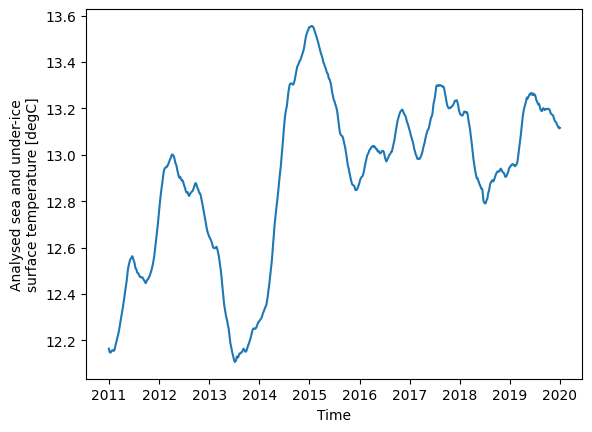

Ecart-type brut = 3.1717424392700195
Ecart-type moyenne mobile = 0.3631448447704315


In [2]:
sstMoyenneMobile = sstTemporelUnivariee.rolling(time=365).mean()
sstMoyenneMobile.plot()
print(sstMoyenneMobile)
plt.show()
print("Ecart-type brut =", float(sstTemporelUnivariee.std()))
print("Ecart-type moyenne mobile =", float(sstMoyenneMobile.std()))


> ### Comment exploiter notre courbe ?
Tout d'abord on peut remarquer que notre courbe est beaucoup plus lisse notamment puisque nos oscillations saisonnières ont disparus. De plus nos variations se font au niveau pluriannuelle. On observe une évolution lente de la SST moyenne sur la période. Enfin  notre écart-type brut est d'environ 3.17°C tandis que l'écart-type de notre moyenne mobile est d'environ 0.36°C ainsi on peut justifier la différence de dispersion de nos données sur nos courbes.
Pour conclure la forte saisonnalité masque en partie les variations de plus longue période. Le lissage par moyenne mobile peremt de réduire la variabilité et montrer l'évolution de la SST moyenne sur notre période.


> ## Décomposition saisonnière

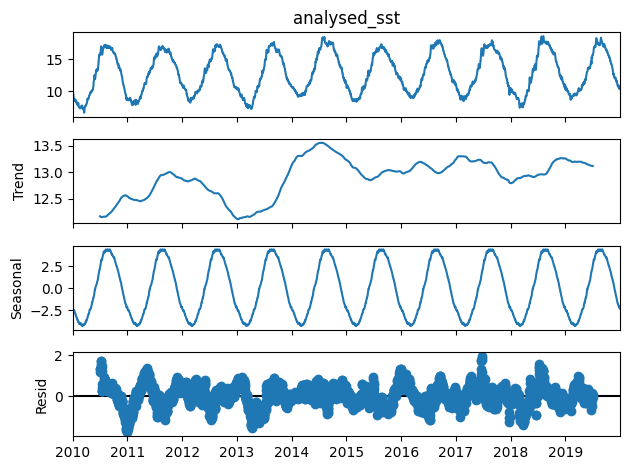


--- Observed (brut) ---
mean = 12.862058907975763
std  = 3.1721766841437278
min  = 6.613592624664307 max = 18.623645782470703
q05  = 8.279285526275634 q50 = 12.702805042266846 q95 = 17.46568260192871
range(min-max) = 12.010053157806396
range(q95-q05) = 9.186397075653074

--- Trend (tendance) ---
mean = 12.90049576024566
std  = 0.3632000820857582
min  = 12.107477918389728 max = 13.555884275044482
q05  = 12.170828481439042 q50 = 12.961988828606803 q95 = 13.4083906066581
range(min-max) = 1.448406356654754
range(q95-q05) = 1.2375621252190587

--- Seasonal (saisonnier) ---
mean = -0.0012778932837493287
std  = 3.059501222674802
min  = -4.30766223211311 max = 4.467812940106827
q05  = -4.1458475860236526 q50 = -0.11318728576737891 q95 = 4.381117475146674
range(min-max) = 8.775475172219938
range(q95-q05) = 8.526965061170326

--- Residual (résidu) ---
mean = 0.008557374486901591
std  = 0.5149400955674575
min  = -1.774127159548235 max = 1.9642580019053153
q05  = -0.8804484523354363 q50 = 0.02395

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

sstPandas = sstTemporelUnivariee.to_pandas()

decomposition = seasonal_decompose(
    sstPandas,
    model="additive",
    period=365
)

decomposition.plot()
plt.show()